<a href="https://colab.research.google.com/github/RamirezCazaresCristianOmar/M-todos-Num-ricos-1/blob/main/Polinomio_Interpolante_de_Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def diferencias_divididas(x, y):
    #Calculamos la tabla de diferencias divididas.
    n = len(x)  # Número de puntos
    tabla = np.zeros((n, n))  # Inicializa la tabla de diferencias divididas
    tabla[:, 0] = y  # La primera columna es y
    for j in range(1, n):  # Itera sobre las columnas
        for i in range(n - j):  # Itera sobre las filas
            # Calcula la diferencia dividida
            tabla[i, j] = (tabla[i + 1, j - 1] - tabla[i, j - 1]) / (x[i + j] - x[i])
    return tabla  # Retorna la tabla de diferencias divididas


#Definimos los datos de la tabla
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([-5, 1, 9, 25, 55, 105])

In [19]:
def polinomio_newton(x, y, val):

    tabla = diferencias_divididas(x, y)

    n = len(x)

    p = tabla[0, 0]

    for i in range(1, n):

        term = tabla[0, i]

        for j in range(i):

            term *= (val - x[j])

        p += term

    return p

In [20]:
# Rango de valores para graficar el polinomio
x_grafico = np.linspace(min(x), max(x), 100)
y_grafico = np.array([polinomio_newton(x, y, val) for val in x_grafico])

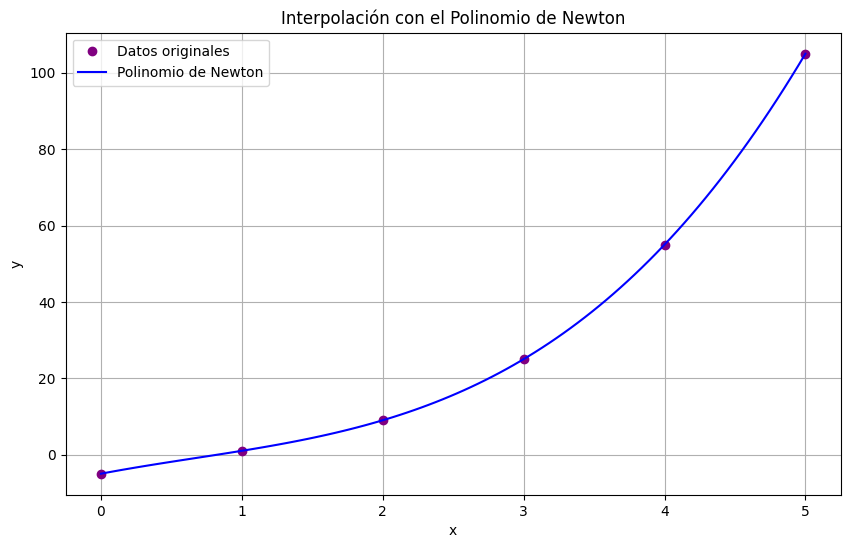

In [21]:
# Grafica
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Datos originales',color="purple")
plt.plot(x_grafico, y_grafico, label='Polinomio de Newton',color="blue")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación con el Polinomio de Newton')
plt.legend()
plt.grid(True)
plt.show()